## Network Analysis in practice

#### Example 1 - Shortest Path Calculation

Let's say, we want to find the shortest path in a network:

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
g = nx.Graph()

In [3]:
g.add_edge('a','b',weight=0.1)
g.add_edge('b','c',weight=1.5)
g.add_edge('a','c',weight=1.0)
g.add_edge('c','d',weight=2.2)

In [4]:
nx.shortest_path(g,'b','d')

['b', 'c', 'd']

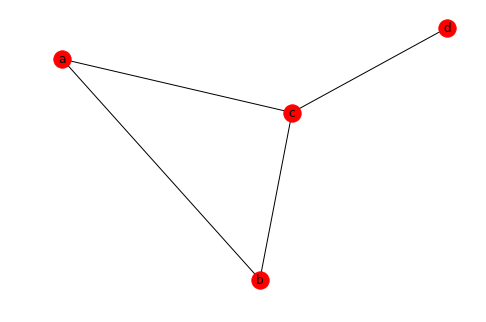

In [5]:
nx.draw(g,with_labels=True)

Let's see some example use cases now

#### Example 2 - PageRank Algorithm

PageRank (PR) is an algorithm used by Google Search to rank websites in their search engine results. PageRank was named after Larry Page, one of the founders of Google. PageRank is a way of measuring the importance of website pages. According to Google:

    PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites.
    
The PageRank algorithm outputs a probability distribution used to represent the likelihood that a person randomly clicking on links will arrive at any particular page. The PageRank computations require several passes, called “iterations”, through the collection to adjust approximate PageRank values to more closely reflect the theoretical true value

###### Simple implementation of the PageRank algorithm

In [6]:
# Initialize directed graph
G = nx.DiGraph()

In [7]:
# Add edges (implicitely adds nodes)
G.add_edge(1,6,weight=0.1)
G.add_edge(2,6,weight=1.2)
G.add_edge(3,6,weight = 0.6)
G.add_edge(4,6,weight = 2.2)
G.add_edge(5,6,weight = 0.3)
G.add_edge(4,5,weight = 1.7)
G.add_edge(6,7,weight = 0.9)

In [8]:
# Compute pagerank (keys are node IDs, values are pageranks)
nx.pagerank(G)

{1: 0.0625775879310217,
 6: 0.32505261660749635,
 2: 0.0625775879310217,
 3: 0.0625775879310217,
 4: 0.0625775879310217,
 5: 0.08576320745995068,
 7: 0.3388738242084661}

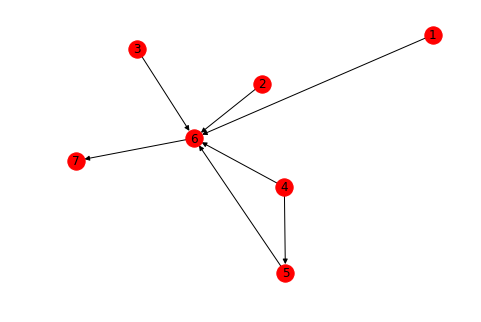

In [9]:
nx.draw(G,with_labels=True)

According to this we can see that node 7 has the highest pagerank followed by node 6

#### Example 3 - Zachary Karate Club

Zachary's karate club is a well-known social network of a university karate club.
A social network of a karate club was studied by Wayne W. Zachary for a period of three years from 1970 to 1972. The network captures 34 members of a karate club, documenting 78 pairwise links between members who interacted outside the club. During the study a conflict arose between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two. Half of the members formed a new club around Mr. Hi; members from the other part found a new instructor or gave up karate. Based on collected data Zachary correctly assigned all but one member of the club to the groups they actually joined after the split.

We will try to determine who these important members in the network are, and from there social interations (represented by the network), determine who will go int each group when the club splits

First lets load the data

In [10]:
G = nx.karate_club_graph()

Let's use degree to determine who the most important members in the group are

In [11]:
print("Node Degree")
for v in G:
    print('%s %s' % (v, G.degree(v)))

Node Degree
0 16
1 9
2 10
3 6
4 3
5 4
6 4
7 4
8 5
9 2
10 3
11 1
12 2
13 5
14 2
15 2
16 2
17 2
18 2
19 3
20 2
21 2
22 2
23 5
24 3
25 3
26 2
27 4
28 3
29 4
30 4
31 6
32 12
33 17


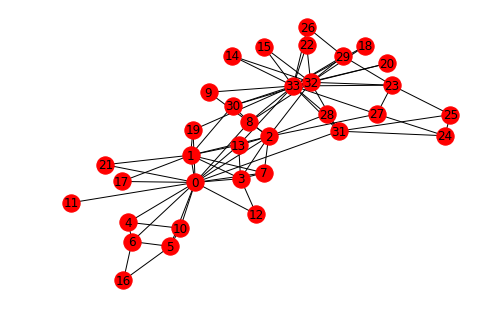

In [12]:
nx.draw(G, with_labels=True)

We will attempt to allocate members to two subgroups

In [13]:
from networkx.algorithms import community
import numpy as np

We use the kernighan_lin_bisection method to split the network into two subnetworks

In [14]:
groups = list(community.kernighan_lin_bisection(G))

In [15]:
group_id = list()

In [16]:
for s in list(G.nodes):
    if np.isin(s,list(groups[0])):
        group_id.append(1)
    else:
        group_id.append(2)

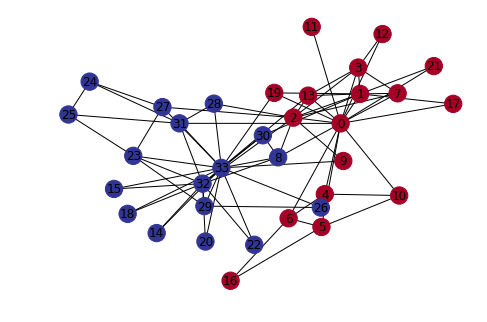

In [17]:
nx.draw(G,cmap=plt.cm.RdYlBu, node_color=group_id,with_labels=True)

We have identified the members of two subgroups within the karate club, if we compare this to the actual split that occured, it turns out that only node number 9 is assigned to the wrong group